In [1]:
import rhalphalib as rl
# import coffea
import uproot
import hist
import mplhep as hep
import numpy as np
import matplotlib.pyplot as plt
import json, yaml
import pickle
import tqdm
from tqdm.rich import trange, tqdm
from rich.progress import track
from rich.progress import Progress
import logging
import pickle
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level=logging.WARNING, format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)

log = logging.getLogger("rich")

In [2]:
import os
base = '/home/anovak/work/htt_refit'
os.chdir(base)

In [3]:
import samplelists
import processmap

In [4]:
processmap.process_map.keys()

odict_keys(['zll', 'zee', 'zem', 'zmm', 'ztt', 'wjets', 'vqq', 'qcd', 'tt-dilep', 'tt-semilep', 'tt-had', 'st', 'vv', 'h125', 'phi10', 'phi20', 'phi30', 'phi40', 'phi50', 'phi75', 'phi100', 'phi125', 'phi150', 'phi200', 'phi250', 'phi300', 'data'])

In [5]:
import yaml, os, copy

with open("metadata/xs.yml") as stream:
    xs_dict = yaml.safe_load(stream)
# xs_dict

In [6]:
samplelists.getSamplesData("2017")

['SingleElectron_Run2017B',
 'SingleElectron_Run2017C',
 'SingleElectron_Run2017D',
 'SingleElectron_Run2017E',
 'SingleElectron_Run2017F',
 'SingleMuon_Run2017B',
 'SingleMuon_Run2017C',
 'SingleMuon_Run2017D',
 'SingleMuon_Run2017E',
 'SingleMuon_Run2017F',
 'MET_Run2017B',
 'MET_Run2017C',
 'MET_Run2017D',
 'MET_Run2017E',
 'MET_Run2017F']

In [7]:
lumi_dict = {
    "2016APV": 19.52,
    "2016": 16.81,
    "2017": 41.48,
    "2018": 59.83,
}

In [8]:
# scaled_all = {}
# for year in lumi_dict.keys():
#     lumi = lumi_dict[year]
#     scaled_all[year] = {}
#     for process, samples in tqdm(processmap.process_map.items()):
#         if process in ["zee", "zmm", "zll"]:
#             continue
#         scaled_process = {}
#         for sample in samples:
#             if process in ["zee", "zem", "zmm", "ztt"]:
#                 bare_sample = '_'.join(sample.split('_')[:-1])
#             else:
#                 bare_sample = sample
#             path = f"inputs/{year}/hists_sum_{bare_sample}.hist"
#             log.debug(f"Readign sample: {sample}, from: {path}")
#             if os.path.exists(path):
#                 with open(path, "rb") as f:
#                     loaded = pickle.load(f)
#                 nd_hist = loaded['met_nn_kin'].to_hist()
#                 sumw = loaded['sumw'][bare_sample]
#                 if "Run" in sample:
#                     _factor = 1.
#                 else:
#                     _factor = lumi
#                 # log.debug(f"Scaling {sample} by {_factor:.9f} (lumi = {lumi}, xs = {xs:.3f}, sumw = {sumw:.3f})")
#                 raw_scaled = nd_hist * _factor
#                 scaled_process[sample] = copy.deepcopy(raw_scaled[{'dataset': sample}])
#         scaled_all[year][process] = scaled_process

In [9]:
# scaled_all['2017']['zem'].keys()

In [10]:
# merged_all = {}
# for process in scaled_all.keys():
#     merged_all[process] = sum([scaled_all[process][dataset] for dataset in scaled_all[process].keys()])

In [11]:
region_map = {}
metcut_map = {}
s = hist.tag.Slicer()
loc = hist.tag.loc
_cat = "hadhad"
had_th_lo, had_th_hi = 75.0, 150.0j
region_map[_cat] = {
    "sig": {
        "nom": {
            'region': f"{_cat}_signal_met",
            'met': s[had_th_hi::sum],
        },
        "fail": {
            'region': f"{_cat}_cr_dphi_inv",
            'met': s[had_th_hi::sum],
        },
    },
    "top_cr": {
        "nom": {
            'region': f"{_cat}_cr_b_mu_iso",
            'met': s[had_th_hi::sum],
        },
        "fail": {
            'region': f"{_cat}_cr_b_mu_iso_dphi_inv",
            'met': s[had_th_hi::sum],
        },
    },
    "wlnu_cr": {
        "nom": {
            'region': f"{_cat}_cr_mu_iso",
            'met': s[had_th_hi::sum],
        },
        "fail": {
            'region': f"{_cat}_cr_mu_iso_dphi_inv",
            'met': s[had_th_hi::sum],
        },
    },
    "qcd_cr": {
        "nom": {
            'region': f"{_cat}_cr_mu",
            'met': s[had_th_hi::sum],
        },
        "fail": {
            'region': f"{_cat}_cr_mu_dphi_inv",
            'met': s[had_th_hi::sum],
        },
    },
}
lep_th_lo, lep_th_hi = 50.0j, 75.0j
for _cat in ["hadel", "hadmu"]:
    region_map[_cat] = {
        "sig": {
            "nom": {
                'region': f"{_cat}_signal",
                'met': s[lep_th_hi::sum],
            },
            "fail": {
                'region': f"{_cat}_signal",
                'met': s[lep_th_lo:lep_th_hi:sum],
            },
        },
        "top_cr": {
            "nom": {
                'region': f"{_cat}_cr_b",
                'met': s[lep_th_hi::sum],
            },
            "fail": {
                'region': f"{_cat}_cr_b_dphi_inv",
                'met': s[lep_th_lo:lep_th_hi:sum],
            },
        },
        "wlnu_cr": {
            "nom": {
                'region': f"{_cat}_cr_w",
                'met': s[lep_th_hi::sum],
            },
            "fail": {
                'region': f"{_cat}_cr_w_dphi_inv",
                'met': s[lep_th_lo:lep_th_hi:sum],
            },
        },
        "qcd_cr": {
            "nom": {
                'region': f"{_cat}_cr_qcd",
                'met': s[lep_th_hi::sum],
            },
            "fail": {
                'region': f"{_cat}_cr_qcd",
                'met': s[lep_th_lo:lep_th_hi:sum],
            },
        },
    }

region_map['hadhad']['sig']['nom']['region'], region_map['hadhad']['sig']['nom']['met']

('hadhad_signal_met', slice(150j, None, <built-in function sum>))

In [12]:
channels = ['hadel', 'hadmu', 'hadhad']
regions = ["sig", "top_cr", "wlnu_cr", "qcd_cr"]

nnCuts = {
    "hadhad": 0.9999j,
    "hadel": 0.98j, #0.98
    "hadmu": 0.98j, #0.98
}
nnLooseCuts = {
        "hadhad": 0.995j,
        "hadel": 0.9j,  #0.9
        "hadmu": 0.9j,  #0.9
    }

In [13]:
# # make templates
# for sample in merged_all.keys():
#     for channel in channels:
#         fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#         axs = axs.flatten()
#         for i, region in enumerate(["sig", "top_cr", "wlnu_cr"]):
#             nnCut, nnLooseCut = nnCuts[channel], nnLooseCuts[channel]
#             presliced2d = merged_all[sample][{'systematic': 'nominal', 
#                        'h_pt': sum, 
#                        'region': region_map[channel][region]['nom']['region'],
#                        'met_pt': region_map[channel][region]['nom']['met'],
#                       }]
#             tpass = presliced2d[{'nn_disc': s[nnCut::sum]}]
#             tloose = presliced2d[{'nn_disc': s[nnLooseCut:nnCut:sum]}]
#             tfail = presliced2d[{'nn_disc': s[:nnLooseCut:sum]}]
    
#             axs[i].set_title(region)
#             fig.suptitle(f"{channel}: {sample}")
#             tpass.plot(yerr=False, ax=axs[i], label='Pass')
#             tloose.plot(yerr=False, ax=axs[i], label="Loose"), 
#             tfail.plot(yerr=False, ax=axs[i], label="Fail"), 
#             axs[i].legend()

In [14]:
# scaled_all['2016APV']['ztt']['DYJetsToLL_Pt-50To100_Ztt']

In [15]:
def apply_slice(h_obj, sli):
    return h_obj[sli]

In [16]:
r = np.array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 200., 250., 300., 350., 400.])

In [17]:
# %%time 

# from rich.progress import Progress
# from rich.progress import TextColumn, BarColumn, MofNCompleteColumn, TaskProgressColumn, TimeRemainingColumn

# with Progress(
#     TextColumn("[progress.description]{task.description}"),
#     BarColumn(),
#     TaskProgressColumn(),
#     MofNCompleteColumn(),
#     TimeRemainingColumn(),
# ) as progress:
#     tr_year = progress.add_task("[red]Year...", total=4)
#     tr_channel = progress.add_task("[green]Channel...", total=3)
#     tr_sample = progress.add_task("[cyan]Sample...")

#     fitted_temps = {}
#     for year in list(lumi_dict.keys()):
#         progress.update(tr_year, advance=1)
#         fitted_temps[year] = {}
#         progress.reset(tr_channel)
#         for channel in channels:
#             progress.update(tr_channel, advance=1)
#             fitted_temps[year][channel] = {}
#             progress.reset(tr_sample)
#             for process in list(scaled_all[year].keys()):
#                 progress.update(tr_sample, advance=1, total=len(scaled_all[year].keys()))
#                 fitted_temps[year][channel][process] = {}
#                 for sample in scaled_all[year][process].keys():
#                     fitted_temps[year][channel][process][sample] = {}
#                     for i, region in enumerate(["sig", "top_cr", "wlnu_cr"]):
#                         rsysts = list(scaled_all[year][process][sample].axes['systematic'])
#                         fitted_temps[year][channel][process][sample][region] = {}
#                         for syst in rsysts:         
#                             fitted_temps[year][channel][process][sample][region][syst] = {"pass": None, "loose": None, "fail": None}
#                             nnCut, nnLooseCut = nnCuts[channel], nnLooseCuts[channel]
#                             _slice = {'systematic': syst, 
#                                        'h_pt': sum, 
#                                        'region': region_map[channel][region]['nom']['region'],
#                                        'met_pt': region_map[channel][region]['nom']['met'],
#                             }
#                             for _nn, sli in zip(["pass", "loose", "fail"], [s[nnCut::sum], s[nnLooseCut:nnCut:sum], s[:nnLooseCut:sum]]):
#                                 fitted_temps[year][channel][process][sample][region][syst][_nn] = \
#                                     apply_slice(scaled_all[year][process][sample], {**_slice, "nn_disc": sli})
#                                 # future = pool.submit(apply_slice, scaled_all[year][process][sample], {**_slice, "nn_disc": sli})
#                                 # fitted_temps[year][channel][process][sample][region][syst][_nn] = future
#                                 # future_set.add(future)

In [18]:
# systs = []
# for year in fitted_temps.keys():
#     for channel in fitted_temps[year].keys():
#         for process in fitted_temps[year][channel].keys():
#             for sample in fitted_temps[year][channel][process].keys():
#                 for region in fitted_temps[year][channel][process][sample].keys():
#                     systs.extend(list(fitted_temps[year][channel][process][sample][region].keys()))
# list(set(systs))
                    

In [19]:
# with open('templates.pkl', 'wb') as handle:
#     pickle.dump(fitted_temps, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
with open('templates.pkl', 'rb') as handle:
    fitted_temps = pickle.load(handle)

In [21]:
hep.style.use("CMS")

In [22]:
import collections

def fetch_temp(year, channel, region, nnreg, process, syst='nominal', rebin=None):
    if not isinstance(process, list):
        process = [process]
    if not isinstance(year, list):
        year = [year]
    _temps = []
    for y in year:
        for p in process:
            for sample in fitted_temps[y][channel][p].keys():
                # print(y, channel, p, sample, region, nnreg, syst)
                try:
                    _temps.append(fitted_temps[y][channel][p][sample][region][syst][nnreg])
                except:
                    _temps.append(fitted_temps[y][channel][p][sample][region]['nominal'][nnreg])
    _temp = sum(_temps)
    if rebin == "one":
        # print([_temp.axes[0].edges[0], _temp.axes[0].edges[-1]])
        _temp = _temp[hist.rebin(edges=[_temp.axes[0].edges[0], _temp.axes[0].edges[-1]])]
    elif rebin == "two":
        reb_arr = np.r_[_temp.axes[0].edges[:15:2], _temp.axes[0].edges[16:]]
        _temp = _temp[hist.rebin(edges=reb_arr)]
    elif isinstance(rebin, (collections.abc.Sequence, np.ndarray)):
        _temp = _temp[hist.rebin(rebin)]
    _mask = _temp.values() < 0
    _temp.view().value[_mask] = 0.0
    _temp.view().variance[_mask] = 0.0
    return _temp

def rename1daxis(h_obj, name=None):
    new = hist.new.Var(h_obj.axes[0].edges, 
                       name=name if name is not None else h_obj.axes[0].name
                      ).Weight()
    new.view().value = copy.deepcopy(h_obj.values())
    new.view().variance = copy.deepcopy(h_obj.variances())
    return new

In [27]:
import os
np.seterr(divide='ignore')

base = '/home/anovak/work/htt_refit'


import os
from contextlib import contextmanager

@contextmanager
def pushd(new_dir):
    previous_dir = os.getcwd()
    os.chdir(new_dir)
    try:
        yield
    finally:
        os.chdir(previous_dir)

print(os.getcwd())

with pushd(os.path.join(os.getcwd(), "testfitall")):
    print(os.getcwd())
print(os.getcwd())

/home/anovak/work/htt_refit
/home/anovak/work/htt_refit/testfitall
/home/anovak/work/htt_refit


In [28]:
# build_htt("testfitall", years=[["2016APV"], ["2016"], ["2017"], ["2018"]])

In [29]:
import fnmatch
patterns = ['hadelwlnucrpass', 'y2016APVhadel*']
any([fnmatch.fnmatch('hadelwlnucrpass', p) for p in patterns])

True

In [41]:
from __future__ import print_function, division
import sys
import os
import rhalphalib as rl
import numpy as np
import scipy.stats
import pickle
import ROOT

rl.util.install_roofit_helpers()
# rl.ParametericSample.PreferRooParametricHist = False

rebin = None
single_bin_regions = []
# rebin = "two"
regions = ["sig", "top_cr", "wlnu_cr"]
nn_regs = ['pass', 'loose', 'fail']
# year='2016APV'
single_bin_regions = []
# single_bin_regions = ['hadeltopcrloose', 'hadeltopcrpass', 'hadelsigpass']
single_bin_regions = ['*cr*', '*fail*']
# year=['2016APV', '2016', '2017', '2018']
# year = '2017'
def build_htt(tmpdir, years):
    rebin = None
    model = rl.Model("combined")
    model.t2w_config = ("-P HiggsAnalysis.CombinedLimit.PhysicsModel:multiSignalModel  --PO verbose  --channel-masks "
                            "--PO 'map=.*/*h125*:r[1,-500,500]' ")

    # ['zem', 'ztt', 'wjets', 'vqq', 'qcd', 'st', 'vv', 
    # 'h125', 
    #'phi10', 'phi20', 'phi30', 'phi40', 'phi50', 'phi75', 'phi100', 'phi125', 'phi150', 'phi200', 'phi250', 'phi300', 'data'] 
    merge_map = {
        'top': ['tt-dilep', 'tt-semilep', 'tt-had', 'st'],
        'wlnu': ['wjets'],
        'vother': ['zem', 'vqq', 'vv'],    
    }
    for year in years:
        _yearlabel = year if isinstance(year, str) else "".join(year)
        _yearlabel = "y"+_yearlabel
        model_year = rl.Model(_yearlabel)
        model_year.t2w_config = ("-P HiggsAnalysis.CombinedLimit.PhysicsModel:multiSignalModel  --PO verbose  --channel-masks "
                                "--PO 'map=.*/*h125*:r[1,-500,500]' ")
        lumi = rl.NuisanceParameter(f"CMS_lumi_{_yearlabel}", "lnN")
        sys_tt = rl.NuisanceParameter(f"CMS_norm_top_{_yearlabel}", "lnN")
        sys_w = rl.NuisanceParameter(f"CMS_norm_w_{_yearlabel}", "lnN")
        sys_dy = rl.NuisanceParameter(f"CMS_norm_ztt_{_yearlabel}", "lnN")

        sys_dy = rl.NuisanceParameter(f"CMS_norm_ztt_{_yearlabel}", "lnN")
        syst_np_dict = {}
        for _sys in ["pileup_weight", "JES", "JER", "UES", "L1PreFiring", "TopPtReweight"]:
            syst_np_dict[_sys] = rl.NuisanceParameter(f"CMS_sys_{_sys}_{_yearlabel}", "shape")  
    
        # Efficiencies
        # add split per hadhad/hadel/hadmu
        rate_map = {
            "ztt": "xtt",
            "h125": "xtt",
            "wlnu": "wlnu",
            "top": "top",
        }
        sys_dict_pf, sys_dict_lpf = {}, {}
        for channel in channels:
            for _sample in ["h125", "ztt", "top", "wlnu"]: 
                # PF
                _nuis_obj = rl.IndependentParameter(f"rate{_yearlabel}_{channel}_{rate_map[_sample]}_effSF", 1.0, 0, 3)
                if _nuis_obj.name not in [p.name for p in sys_dict_pf.values()]:
                    sys_dict_pf[f"{channel}{_sample}"] = _nuis_obj
                else:
                    sys_dict_pf[f"{channel}{_sample}"] = {p.name: p for p in sys_dict_pf.values()}[_nuis_obj.name]
                # LPF
                _nuis_obj = rl.IndependentParameter(f"rate{_yearlabel}_{channel}_{rate_map[_sample]}_LeffSF", 1.0, 0, 3)
                if _nuis_obj.name not in [p.name for p in sys_dict_lpf.values()]:
                    sys_dict_lpf[f"{channel}{_sample}"] = _nuis_obj
                else:
                    sys_dict_lpf[f"{channel}{_sample}"] = {p.name: p for p in sys_dict_lpf.values()}[_nuis_obj.name]
        # sys_dict_pf = {_sample: rl.IndependentParameter(f"rate{_yearlabel}_{_sample}_effSF", 1.0, 0, 3) for _sample in ["ztt", "top", "wlnu"]}
        # sys_dict_lpf = {_sample: rl.IndependentParameter(f"rate{_yearlabel}_{_sample}_LeffSF", 1.0, 0, 3) for _sample in ["ztt", "top", "wlnu"]}
        
        morph_map = {
            "top": "top",
            "wlnu": "wlnu",
            "ztt": "xtt",
            "h125": "xtt",
        }
        # morph_map = {
        #     "top": "all",
        #     "wlnu": "all",
        #     "ztt": "all",
        # }
        # add split per hadhad/hadel/hadmu
        sys_dict_smear, sys_dict_scale = {}, {}  # Have to do it like this to not create duplicate nuisances for merged samples
        for channel in channels:
            for _sample in ["ztt", "top", "wlnu","h125"]:
                # Scale
                _nuis_obj = rl.NuisanceParameter(f"CMS_morph_scale_{_yearlabel}_{channel}_{morph_map[_sample]}", "shape") 
                if _nuis_obj.name not in [p.name for p in sys_dict_scale.values()]:
                    sys_dict_scale[f"{channel}{_sample}"] = _nuis_obj
                else:
                    sys_dict_scale[f"{channel}{_sample}"] = {p.name: p for p in sys_dict_scale.values()}[_nuis_obj.name]
                # Smear
                _nuis_obj = rl.NuisanceParameter(f"CMS_morph_smear_{_yearlabel}_{channel}_{morph_map[_sample]}", "shape") 
                if _nuis_obj.name not in [p.name for p in sys_dict_smear.values()]:
                    sys_dict_smear[f"{channel}{_sample}"] = _nuis_obj
                else:
                    sys_dict_smear[f"{channel}{_sample}"] = {p.name: p for p in sys_dict_smear.values()}[_nuis_obj.name]
        # sys_dict_smear = {_sample: rl.NuisanceParameter(f"CMS_morph_smear_{_yearlabel}_{morph_map[_sample]}", "shapeU", nowarn=True) for _sample in ["ztt", "top", "wlnu"]}
        # sys_dict_scale = {_sample: rl.NuisanceParameter(f"CMS_morph_scale_{_yearlabel}_{morph_map[_sample]}", "shapeU", nowarn=True) for _sample in ["ztt", "top", "wlnu"]}
        # sys_smear =  rl.NuisanceParameter(f"CMS_morph_smear_{_yearlabel}", "shapeU", nowarn=True) 
        # sys_scale =  rl.NuisanceParameter(f"CMS_morph_scale_{_yearlabel}", "shapeU", nowarn=True) 
        # print(sys_dict_smear)
        
        for channel in channels:
            model_channel = rl.Model(channel)
            model_channel.t2w_config = ("-P HiggsAnalysis.CombinedLimit.PhysicsModel:multiSignalModel    --PO verbose   --channel-masks "
                                "--PO 'map=.*/*h125*:r[1,-500,500]' ")
    
            for i, region in enumerate(regions):
                for j, nnreg in enumerate(nn_regs):
                    ch = rl.Channel(f"{_yearlabel}{channel}{region.replace('_', '')}{nnreg}")
                    if any([fnmatch.fnmatch(ch.name, p) for p in single_bin_regions]):
                        print(f"Single binning {ch.name}")
                        _rebin = "one"
                        _single_bin = True
                    else:
                        _single_bin = False
                        _rebin = rebin
                    model.addChannel(ch)
                    model_year.addChannel(ch)
                    model_channel.addChannel(ch)
                    obs = rl.Observable(f"massreg_{i}{j}", fetch_temp(year, channel, region, nnreg, 'data', rebin=_rebin).axes[0].edges)  
                    # obs = rl.Observable(f"massreg", fetch_temp(year, channel, region, nnreg, 'data', rebin=_rebin).axes[0].edges)  
                    data_obs = fetch_temp(year, channel, region, nnreg, 'data', syst='nominal',rebin=_rebin)
                    data_templ = (data_obs.values(), obs.binning, obs.name)
                    ch.setObservation(data_templ)
                    
                    for sName in ['ztt', 'qcd', 'h125'] + ['wlnu', 'top', 'vother']:
                        if sName in merge_map.keys():
                            sNameFetch = merge_map[sName]
                        else:
                            sNameFetch = sName
                        templ = fetch_temp(year, channel, region, nnreg, sNameFetch, syst='nominal', rebin=_rebin) 
                        templ = rename1daxis(templ, obs.name)
                        if np.sum(templ.values()) < 0.000001:
                            continue
                        stype = rl.Sample.SIGNAL if sName == "h125" else rl.Sample.BACKGROUND
                        sample = rl.TemplateSample(ch.name + "_" + sName, stype, templ)
                        sample.setParamEffect(lumi, 1.1)

                        # if sName in ["ztt", "h125", "wlnu", "top"] and _single_bin is not True and nnreg == "pass":
                        # if sName in ["ztt", "h125"] and _single_bin is not True and nnreg == "pass":
                        if False:
                            morph_base = rl.MorphHistW2(templ)
                            _up = np.nan_to_num(morph_base.get(smear=1 + 0.2).values()/templ.values(), nan=1.0)
                            _down = np.nan_to_num(morph_base.get(smear=1 - 0.2).values()/templ.values(), nan=1.0)
                            sample.setParamEffect(sys_dict_smear[f"{channel}{sName}"], _up, _down, scale=1, nowarn=True)
                            # sample.setParamEffect(sys_smear[sName], _up, _down, scale=1)
    
                            _up = np.nan_to_num(morph_base.get(shift=10).values()/templ.values(), nan=1.0)
                            _down = np.nan_to_num(morph_base.get(shift=10).values()/templ.values(), nan=1.0)
                            sample.setParamEffect(sys_dict_scale[f"{channel}{sName}"], _up, _down, scale=1, nowarn=True)

                        for _sys in ["pileup_weight", "JES", "JER", "UES", "L1PreFiring"]:
                            _up = fetch_temp(year, channel, region, nnreg, sNameFetch, syst=f'{_sys}Up', rebin=_rebin)
                            _down = fetch_temp(year, channel, region, nnreg, sNameFetch, syst=f'{_sys}Down', rebin=_rebin)
                            _up_rel = np.nan_to_num((_up.values()/templ.values()), nan=1.0)
                            _down_rel = np.nan_to_num((_down.values()/templ.values()), nan=1.0)
                            sample.setParamEffect(syst_np_dict[_sys], _up_rel, _down_rel)
    
                        if sName in ['top']:
                            sample.setParamEffect(sys_tt, 1.3)
                            for _sys in ["TopPtReweight"]:
                                _up = fetch_temp(year, channel, region, nnreg, sNameFetch, syst=f'{_sys}Up', rebin=_rebin)
                                _down = fetch_temp(year, channel, region, nnreg, sNameFetch, syst=f'{_sys}Down', rebin=_rebin)
                                _up_rel = np.nan_to_num((_up.values()/templ.values()), nan=1.0)
                                _down_rel = np.nan_to_num((_down.values()/templ.values()), nan=1.0)
                                sample.setParamEffect(syst_np_dict[_sys], _up_rel, _down_rel)
                        if sName in ['wlnu']:
                            sample.setParamEffect(sys_w, 1.3)
                        if sName in ['ztt']:
                            sample.setParamEffect(sys_dy, 1.3)
    
                        ch.addSample(sample)
                    ch.autoMCStats()

                    
            # Do P/F setup
            flowing_samples = ["top", "wlnu", "ztt"]
            # flowing_samples = ["top", "ztt"]
            sample_sums = {}
            # sum across cr regions for different nncuts
            for _sample in flowing_samples:
                sample_sums[_sample] = {
                    nnreg: sum([model[f"{_yearlabel}{channel}{r.replace('_', '')}{nnreg}"][_sample].getExpectation(nominal=True).sum() 
                                for r in regions 
                                    if _sample in [s.name.split("_")[-1] for s in model[f"{_yearlabel}{channel}{r.replace('_', '')}{nnreg}"].samples]
                                ])
                    for nnreg in nn_regs
                }
            sample_ratios_PF = {sample: (sample_sums[sample]['pass']+sample_sums[sample]['loose'])/sample_sums[sample]['fail'] 
                                for sample in flowing_samples}
            sample_ratios_LPF = {sample: sample_sums[sample]['pass']/sample_sums[sample]['loose'] 
                                for sample in flowing_samples}

            # Top P/F
            for _sample in flowing_samples:
                nPF = sys_dict_pf[f"{channel}{_sample}"]
                nLPF = sys_dict_lpf[f"{channel}{_sample}"]
                for _model in [model, model_year, model_channel]:
                    for r in regions:
                        # Some samples are 0 in some region - skip
                        _available_samples = [s.name.split("_")[-1] for s in _model[f"{_yearlabel}{channel}{r.replace('_', '')}pass"].samples]
                        if _sample not in _available_samples:
                            continue
                        # Loose/pass
                        _model[f"{_yearlabel}{channel}{r.replace('_', '')}pass"][_sample].setParamEffect(
                            nLPF, 1 * nLPF
                        )
                        _model[f"{_yearlabel}{channel}{r.replace('_', '')}loose"][_sample].setParamEffect(
                            nLPF, (1 - nLPF) * sample_ratios_LPF[_sample] + 1
                        )
                        if _sample in ["ztt"]:
                            continue
                        # Fail/(Loose+Pass)
                        _model[f"{_yearlabel}{channel}{r.replace('_', '')}pass"][_sample].setParamEffect(
                            nPF, 1 * nPF
                        )
                        _model[f"{_yearlabel}{channel}{r.replace('_', '')}loose"][_sample].setParamEffect(
                            nPF, 1 * nPF
                        )
                        _model[f"{_yearlabel}{channel}{r.replace('_', '')}fail"][_sample].setParamEffect(
                            nPF, (1 - nPF) * sample_ratios_PF[_sample] + 1
                        )

            import os
            model_channel.renderCombine(os.path.join(str(tmpdir), f"testModel/{_yearlabel}/{channel}"))
            with pushd(os.path.join(str(tmpdir), f"testModel/{_yearlabel}/{channel}")):
                os.system("bash build.sh &")
        model_year.renderCombine(os.path.join(str(tmpdir), f"testModel/{_yearlabel}"))
        with pushd(os.path.join(str(tmpdir), f"testModel/{_yearlabel}")):
                os.system("bash build.sh &")
        
        
    import os
    os.makedirs(tmpdir, exist_ok=True)
    with open(os.path.join(str(tmpdir), "testModel.pkl"), "wb") as fout:
        pickle.dump(model, fout)

    model.renderCombine(os.path.join(str(tmpdir), "testModel"))
    # return model_channel


build_htt("testfitall", years=[["2016APV"], ["2016"], ["2017"], ["2018"]])
# build_htt("testfitcomb", years=[["2016APV", "2016", "2017", "2018"]])
# build_htt("testfitall", years=[["2016APV?"]])

/tmp/ipykernel_30563/3311363225.py:166: RuntimeWarning: invalid value encountered in divide
  _up_rel = np.nan_to_num((_up.values()/templ.values()), nan=1.0)
/tmp/ipykernel_30563/3311363225.py:167: RuntimeWarning: invalid value encountered in divide
  _down_rel = np.nan_to_num((_down.values()/templ.values()), nan=1.0)
/tmp/ipykernel_30563/3311363225.py:175: RuntimeWarning: invalid value encountered in divide
  _up_rel = np.nan_to_num((_up.values()/templ.values()), nan=1.0)
/tmp/ipykernel_30563/3311363225.py:176: RuntimeWarning: invalid value encountered in divide
  _down_rel = np.nan_to_num((_down.values()/templ.values()), nan=1.0)


Single binning y2016APVhadelsigfail
Single binning y2016APVhadeltopcrpass
Single binning y2016APVhadeltopcrloose
Single binning y2016APVhadeltopcrfail
Single binning y2016APVhadelwlnucrpass
Single binning y2016APVhadelwlnucrloose
Single binning y2016APVhadelwlnucrfail


[15:56:19] WARNING  effect_down (CMS_sys_JES_y2016APV, y2016APVhadmusigloose_qcd) has magnitude       ]8;id=213986;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=25940;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    greater than 50% (173.61%), you might be passing absolute values instead of                    
                    relative                                                                                       

           WARNING  effect_up (CMS_sys_JER_y2016APV, y2016APVhadmusigloose_qcd) has magnitude greater ]8;id=3868;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=555637;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    than 50% (159.24%), you might be passing absolute values instead of relative                   

Single binning y2016APVhadmusigfail
Single binning y2016APVhadmutopcrpass
Single binning y2016APVhadmutopcrloose
Single binning y2016APVhadmutopcrfail
Single binning y2016APVhadmuwlnucrpass
Single binning y2016APVhadmuwlnucrloose
Single binning y2016APVhadmuwlnucrfail
Single binning y2016APVhadhadsigfail
Single binning y2016APVhadhadtopcrpass


[15:56:22] WARNING  effect_down (CMS_sys_JES_y2016APV, y2016APVhadhadtopcrpass_ztt) has magnitude     ]8;id=324055;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=735810;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    greater than 50% (147.85%), you might be passing absolute values instead of                    
                    relative                                                                                       

           WARNING  effect_up (CMS_sys_JER_y2016APV, y2016APVhadhadtopcrpass_ztt) has magnitude       ]8;id=112129;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=304306;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    greater than 50% (79.74%), you might be passing absolute values instead of                     
                    relative                                                                                       

Single binning y2016APVhadhadtopcrloose
Single binning y2016APVhadhadtopcrfail
Single binning y2016APVhadhadwlnucrpass
Single binning y2016APVhadhadwlnucrloose


           WARNING  effect_down (CMS_sys_JES_y2016APV, y2016APVhadhadwlnucrloose_ztt) has magnitude   ]8;id=360521;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=241798;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    greater than 50% (67.69%), you might be passing absolute values instead of                     
                    relative                                                                                       

[15:56:23] WARNING  effect_down (CMS_sys_JES_y2016APV, y2016APVhadhadwlnucrloose_vother) has          ]8;id=628601;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=116137;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    magnitude greater than 50% (140.29%), you might be passing absolute values                     
                    instead of relative                                                                            

Single binning y2016APVhadhadwlnucrfail
Single binning y2016hadelsigfail
Single binning y2016hadeltopcrpass


[15:56:26] WARNING  effect_up (CMS_sys_JES_y2016, y2016hadeltopcrpass_qcd) has magnitude greater than ]8;id=470552;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=425743;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    50% (91.21%), you might be passing absolute values instead of relative                         

Single binning y2016hadeltopcrloose


           WARNING  effect_up (CMS_sys_JES_y2016, y2016hadeltopcrloose_qcd) has magnitude greater     ]8;id=817264;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=53335;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    than 50% (2089.55%), you might be passing absolute values instead of relative                  

Single binning y2016hadeltopcrfail
Single binning y2016hadelwlnucrpass
Single binning y2016hadelwlnucrloose


[15:56:27] WARNING  effect_down (CMS_sys_JES_y2016, y2016hadelwlnucrloose_qcd) has magnitude greater  ]8;id=508418;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=423641;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    than 50% (86.59%), you might be passing absolute values instead of relative                    

Single binning y2016hadelwlnucrfail


[15:56:28] WARNING  effect_down (CMS_sys_JES_y2016, y2016hadmusigpass_qcd) has magnitude greater than ]8;id=462160;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=720016;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    50% (83.86%), you might be passing absolute values instead of relative                         

           WARNING  effect_up (y2016hadmusigpass_mcstat_bin6, y2016hadmusigpass_qcd) has magnitude    ]8;id=363843;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=880634;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    greater than 50% (56.04%), you might be passing absolute values instead of                     
                    relative                                                                                       

           WARNING  effect_down (y2016hadmusigpass_mcstat_bin6, y2016hadmusigpass_qcd) has magnitude  ]8;id=473290;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=186734;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    greater than 50% (56.04%), you might be passing absolute values instead of                     
                    relative                                                                                       

           WARNING  effect_down (CMS_sys_JES_y2016, y2016hadmusigloose_qcd) has magnitude greater     ]8;id=271642;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=831225;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    than 50% (69.57%), you might be passing absolute values instead of relative                    

Single binning y2016hadmusigfail
Single binning y2016hadmutopcrpass
Single binning y2016hadmutopcrloose
Single binning y2016hadmutopcrfail
Single binning y2016hadmuwlnucrpass
Single binning y2016hadmuwlnucrloose


[15:56:30] WARNING  effect_up (CMS_sys_JER_y2016, y2016hadmuwlnucrloose_qcd) has magnitude greater    ]8;id=536609;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=540202;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    than 50% (56.48%), you might be passing absolute values instead of relative                    

Single binning y2016hadmuwlnucrfail
Single binning y2016hadhadsigfail
Single binning y2016hadhadtopcrpass
Single binning y2016hadhadtopcrloose


[15:56:33] WARNING  effect_up (CMS_sys_JES_y2016, y2016hadhadtopcrloose_ztt) has magnitude greater    ]8;id=778101;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=488049;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    than 50% (66.67%), you might be passing absolute values instead of relative                    

Single binning y2016hadhadtopcrfail
Single binning y2016hadhadwlnucrpass


[15:56:34] WARNING  effect_down (CMS_sys_JES_y2016, y2016hadhadwlnucrpass_wlnu) has magnitude greater ]8;id=817060;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=522790;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    than 50% (79.18%), you might be passing absolute values instead of relative                    

Single binning y2016hadhadwlnucrloose
Single binning y2016hadhadwlnucrfail


[15:56:40] WARNING  effect_up (CMS_sys_JES_y2017, y2017hadelsigpass_qcd) has magnitude less than 0,   ]8;id=376240;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=855149;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#232\232]8;;\
                    skipping                                                                                       

           WARNING  effect_up (y2017hadelsigloose_mcstat_bin3, y2017hadelsigloose_qcd) has magnitude  ]8;id=513479;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=481641;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    greater than 50% (81.40%), you might be passing absolute values instead of                     
                    relative                                                                                       

           WARNING  effect_down (y2017hadelsigloose_mcstat_bin3, y2017hadelsigloose_qcd) has          ]8;id=251294;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=48885;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    magnitude greater than 50% (81.40%), you might be passing absolute values instead              
                    of relative                                                                                    

Single binning y2017hadelsigfail
Single binning y2017hadeltopcrpass
Single binning y2017hadeltopcrloose


[15:56:41] WARNING  effect_up (CMS_sys_JER_y2017, y2017hadeltopcrloose_vother) has magnitude greater  ]8;id=175051;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=230109;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    than 50% (104.09%), you might be passing absolute values instead of relative                   

Single binning y2017hadeltopcrfail
Single binning y2017hadelwlnucrpass
Single binning y2017hadelwlnucrloose
Single binning y2017hadelwlnucrfail


[15:56:45] WARNING  effect_up (CMS_sys_JES_y2017, y2017hadmusigloose_qcd) has magnitude greater than  ]8;id=530531;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=394435;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    50% (183.25%), you might be passing absolute values instead of relative                        

           WARNING  effect_up (CMS_sys_JER_y2017, y2017hadmusigloose_qcd) has magnitude greater than  ]8;id=229985;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=372080;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    50% (183.25%), you might be passing absolute values instead of relative                        

Single binning y2017hadmusigfail
Single binning y2017hadmutopcrpass
Single binning y2017hadmutopcrloose
Single binning y2017hadmutopcrfail
Single binning y2017hadmuwlnucrpass
Single binning y2017hadmuwlnucrloose
Single binning y2017hadmuwlnucrfail


[15:56:49] WARNING  effect_up (CMS_sys_JER_y2017, y2017hadhadsigpass_qcd) has magnitude greater than  ]8;id=223514;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=534193;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    50% (64.78%), you might be passing absolute values instead of relative                         

           WARNING  effect_down (CMS_sys_UES_y2017, y2017hadhadsigpass_qcd) has magnitude greater     ]8;id=528521;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=829751;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    than 50% (65.68%), you might be passing absolute values instead of relative                    

Single binning y2017hadhadsigfail
Single binning y2017hadhadtopcrpass
Single binning y2017hadhadtopcrloose
Single binning y2017hadhadtopcrfail
Single binning y2017hadhadwlnucrpass
Single binning y2017hadhadwlnucrloose


[15:56:51] WARNING  effect_up (CMS_sys_JES_y2017, y2017hadhadwlnucrloose_vother) has magnitude less   ]8;id=546081;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=450996;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#232\232]8;;\
                    than 0, skipping                                                                               

           WARNING  effect_up (CMS_sys_JER_y2017, y2017hadhadwlnucrloose_vother) has magnitude less   ]8;id=267304;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=796773;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#232\232]8;;\
                    than 0, skipping                                                                               

Single binning y2017hadhadwlnucrfail


[15:56:55] WARNING  effect_up (CMS_sys_UES_y2018, y2018hadelsigpass_qcd) has magnitude greater than   ]8;id=220494;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=503135;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    50% (97.10%), you might be passing absolute values instead of relative                         

Single binning y2018hadelsigfail
Single binning y2018hadeltopcrpass
Single binning y2018hadeltopcrloose
Single binning y2018hadeltopcrfail
Single binning y2018hadelwlnucrpass
Single binning y2018hadelwlnucrloose
Single binning y2018hadelwlnucrfail


[15:56:58] WARNING  effect_up (CMS_sys_JES_y2018, y2018hadmusigpass_qcd) has magnitude greater than   ]8;id=740940;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=989800;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    50% (68.21%), you might be passing absolute values instead of relative                         

           WARNING  effect_up (CMS_sys_JES_y2018, y2018hadmusigloose_qcd) has magnitude greater than  ]8;id=127406;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=716721;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    50% (63.71%), you might be passing absolute values instead of relative                         

Single binning y2018hadmusigfail
Single binning y2018hadmutopcrpass
Single binning y2018hadmutopcrloose


[15:56:59] WARNING  effect_up (CMS_sys_JES_y2018, y2018hadmutopcrloose_qcd) has magnitude greater     ]8;id=223136;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=246594;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    than 50% (54.02%), you might be passing absolute values instead of relative                    

Single binning y2018hadmutopcrfail
Single binning y2018hadmuwlnucrpass
Single binning y2018hadmuwlnucrloose


[15:57:00] WARNING  effect_up (CMS_sys_pileup_weight_y2018, y2018hadmuwlnucrloose_qcd) has magnitude  ]8;id=85787;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=770970;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    greater than 50% (104.00%), you might be passing absolute values instead of                    
                    relative                                                                                       

           WARNING  effect_down (CMS_sys_pileup_weight_y2018, y2018hadmuwlnucrloose_qcd) has          ]8;id=871297;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=184708;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    magnitude greater than 50% (54.04%), you might be passing absolute values instead              
                    of relative                                                                                    

Single binning y2018hadmuwlnucrfail


[15:57:02] WARNING  effect_up (y2018hadhadsigloose_mcstat_bin5, y2018hadhadsigloose_qcd) has          ]8;id=956610;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=369538;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    magnitude greater than 50% (51.19%), you might be passing absolute values instead              
                    of relative                                                                                    

           WARNING  effect_down (y2018hadhadsigloose_mcstat_bin5, y2018hadhadsigloose_qcd) has        ]8;id=493967;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=412153;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    magnitude greater than 50% (51.19%), you might be passing absolute values instead              
                    of relative                                                                                    

Single binning y2018hadhadsigfail
Single binning y2018hadhadtopcrpass


           WARNING  effect_up (CMS_sys_pileup_weight_y2018, y2018hadhadtopcrpass_ztt) has magnitude   ]8;id=528459;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=504979;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#241\241]8;;\
                    greater than 50% (81.79%), you might be passing absolute values instead of                     
                    relative                                                                                       

           WARNING  effect_down (CMS_sys_pileup_weight_y2018, y2018hadhadtopcrpass_ztt) has magnitude ]8;id=248694;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=799502;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    greater than 50% (119.52%), you might be passing absolute values instead of                    
                    relative                                                                                       

           WARNING  effect_up (CMS_sys_JES_y2018, y2018hadhadtopcrpass_qcd) has magnitude less than   ]8;id=57168;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=360582;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#232\232]8;;\
                    0, skipping                                                                                    

           WARNING  effect_up (CMS_sys_JER_y2018, y2018hadhadtopcrpass_qcd) has magnitude less than   ]8;id=766160;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=79858;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#232\232]8;;\
                    0, skipping                                                                                    

Single binning y2018hadhadtopcrloose


[15:57:03] WARNING  effect_up (CMS_sys_JES_y2018, y2018hadhadtopcrloose_ztt) has magnitude less than  ]8;id=335740;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=156118;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#232\232]8;;\
                    0, skipping                                                                                    

           WARNING  effect_up (CMS_sys_JER_y2018, y2018hadhadtopcrloose_ztt) has magnitude less than  ]8;id=840274;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=501730;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#232\232]8;;\
                    0, skipping                                                                                    

Single binning y2018hadhadtopcrfail
Single binning y2018hadhadwlnucrpass
Single binning y2018hadhadwlnucrloose


           WARNING  effect_down (CMS_sys_JES_y2018, y2018hadhadwlnucrloose_ztt) has magnitude greater ]8;id=304087;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=117046;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#271\271]8;;\
                    than 50% (50.09%), you might be passing absolute values instead of relative                    

           WARNING  effect_up (CMS_sys_JES_y2018, y2018hadhadwlnucrloose_qcd) has magnitude less than ]8;id=103725;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py\sample.py]8;;\:]8;id=712291;file:///home/anovak/cat/rhalphalib/src/rhalphalib/sample.py#232\232]8;;\
                    0, skipping                                                                                    

Single binning y2018hadhadwlnucrfail
Will create a POI  r  with factory  r[1,-500,500]
Mapping  r  to  ['.*/*h125*']  patterns
MH (not there before) will be assumed to be 0
Will scale  y2016APVhadelsigpass/h125  by  r
Will scale  y2016APVhadelsigpass/ztt  by  1
Will scale  y2016APVhadelsigpass/qcd  by  1
Will scale  y2016APVhadelsigpass/wlnu  by  1
Will scale  y2016APVhadelsigpass/top  by  1
Will scale  y2016APVhadelsigpass/vother  by  1
Will scale  y2016APVhadelsigloose/h125  by  r
Will scale  y2016APVhadelsigloose/ztt  by  1
Will scale  y2016APVhadelsigloose/qcd  by  1
Will scale  y2016APVhadelsigloose/wlnu  by  1
Will scale  y2016APVhadelsigloose/top  by  1
Will scale  y2016APVhadelsigloose/vother  by  1
Will scale  y2016APVhadelsigfail/h125  by  r
Will scale  y2016APVhadelsigfail/ztt  by  1
Will scale  y2016APVhadelsigfail/qcd  by  1
Will scale  y2016APVhadelsigfail/wlnu  by  1
Will scale  y2016APVhadelsigfail/top  by  1
Will scale  y2016APVhadelsigfail/vother  by  1
Will scale  y2

In [ ]:
# for bias in 0 1 `seq 5 5 100`
#     do
#     combineTool.py -M FitDiagnostics --expectSignal $bias -n bias$bias -d model_combined.root --cminDefaultMinimizerStrategy 0 --robustFit=1 -t 10 -s 1:10:1 --job-mode interactive --parallel 10
#     done

/home/anovak/work/htt_refit
/home/anovak/work/htt_refit/testfitall
/home/anovak/work/htt_refit


In [28]:
model_channel

NameError: name 'model_channel' is not defined

In [24]:
# x2016APV_dyeffSF, x2016APV_dyLeffSF, x2016APV_topeffSF, x2016APV_topLeffSF
    
#         # WJets efficiency
#         wlnueffSF = rl.IndependentParameter(f"x{_yearlabel}_wlnueffSF", 1.0, 0, 3)
#         wlnuLeffSF = rl.IndependentParameter(f"x{_yearlabel}_wlnuLeffSF", 1.0, 0, 3)

/home/anovak/software/miniforge3/envs/combine/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/anovak/software/miniforge3/envs/combine/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/anovak/software/miniforge3/envs/combine/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


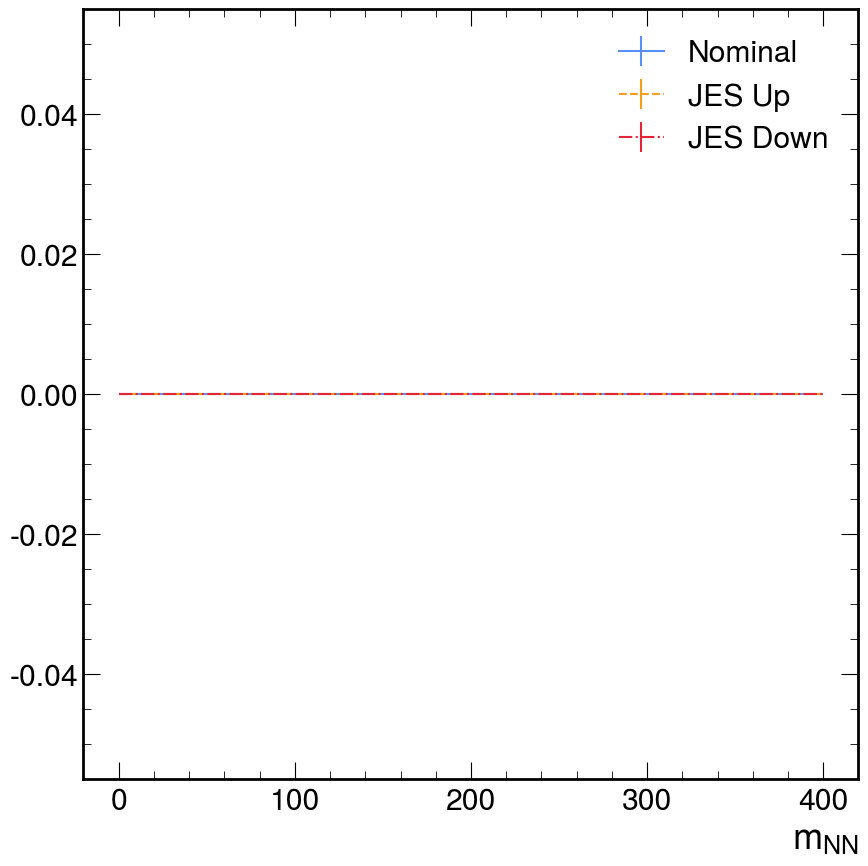

In [25]:
year = "2017"
# channel = 'hadel'
# region = 'top_cr'
nnreg = "pass"
channel = 'hadhad'
region = 'top_cr'
rebin = None
# sample = ['tt-dilep', 'tt-semilep', 'tt-had', 'st']
sample = ['ztt']
syst = "JES"
# syst = "JER"
fetch_temp(year, channel, region, nnreg, sample, syst='nominal',rebin=rebin).plot(label="Nominal")
fetch_temp(year, channel, region, nnreg, sample, syst=f"{syst}Up",rebin=rebin).plot(label=f"{syst} Up", ls='--')
fetch_temp(year, channel, region, nnreg, sample, syst=f"{syst}Down",rebin=rebin).plot(label=f"{syst} Down", ls="-.")

plt.legend()

In [ ]:
import rhalphalib as rl
# import coffea
import uproot
import hist
import mplhep as hep
import numpy as np
import matplotlib.pyplot as plt
import json, yaml
import pickle
import tqdm
from tqdm.rich import trange, tqdm
from rich.progress import track
from rich.progress import Progress
import logging
import pickle
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level=logging.WARNING, format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)

log = logging.getLogger("rich")

In [2]:
with open('mdl.pkl', 'wb') as handle:
    pickle.dump(model_channel, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'model_channel' is not defined

In [3]:
with open('mdl.pkl', 'rb') as handle:
    model_channel = pickle.load(handle)
model_channel['hadhadwlnucrpass']

EOFError: Ran out of input

In [4]:
model_channel['hadhadwlnucrpass']['top'].getExpectation(nominal=True)

NameError: name 'model_channel' is not defined

In [5]:
hep.histplot(model_channel['hadhadwlnucrpass']['top'].getExpectation(nominal=True), label='Nominal')
p = [p for p in model_channel.parameters if p.name=='CMS_sys_TopPtReweight_2016APV'][0]
# p = [p for p in model_channel.parameters if p.name=='CMS_norm_top_2016APV'][0]
p.value = -1
hep.histplot(model_channel['hadhadwlnucrpass']['top'].getExpectation(eval=True), label='Shifted')
p.value = 1
hep.histplot(model_channel['hadhadwlnucrpass']['top'].getExpectation(eval=True), label='Shifted')

NameError: name 'model_channel' is not defined

In [6]:
masks = []
for channel in ['hadel']:
    for reg in ["sig", "topcr", "wlnucr"]:
        for nn in ['pass', 'loose', 'fail']:
            masks.append(f"mask_{channel}{reg}{nn}="+"{x}")
maskstr = ",".join(masks).format(x='1')

def replacenth(string, sub, wanted, n):
    sub, wanted = str(sub), str(wanted)
    import re
    where = [m.start() for m in re.finditer(sub, string)][n-1]
    before = string[:where]
    after = string[where:]
    after = after.replace(sub, wanted, 1)
    newString = before + after
    return newString

In [9]:
base_str = "combine -M GoodnessOfFit --algo saturated model_combined.root "
cmd_dict = {}
for i in range(1, 10):
    parsed = replacenth(maskstr, '1', '0', i)
    # cfg = f"--setParametersForFit {parsed} --setParametersForEval {parsed}"
    cfg = f" --setParametersForEval {parsed}"
    reg_label = [s.split("=")[0] for s in parsed.split(",") if s.split("=")[-1] == '0'][0]
    cmd_dict[reg_label] = cfg
cmd_dict

{'mask_hadelsigpass': ' --setParametersForEval mask_hadelsigpass=0,mask_hadelsigloose=1,mask_hadelsigfail=1,mask_hadeltopcrpass=1,mask_hadeltopcrloose=1,mask_hadeltopcrfail=1,mask_hadelwlnucrpass=1,mask_hadelwlnucrloose=1,mask_hadelwlnucrfail=1',
 'mask_hadelsigloose': ' --setParametersForEval mask_hadelsigpass=1,mask_hadelsigloose=0,mask_hadelsigfail=1,mask_hadeltopcrpass=1,mask_hadeltopcrloose=1,mask_hadeltopcrfail=1,mask_hadelwlnucrpass=1,mask_hadelwlnucrloose=1,mask_hadelwlnucrfail=1',
 'mask_hadelsigfail': ' --setParametersForEval mask_hadelsigpass=1,mask_hadelsigloose=1,mask_hadelsigfail=0,mask_hadeltopcrpass=1,mask_hadeltopcrloose=1,mask_hadeltopcrfail=1,mask_hadelwlnucrpass=1,mask_hadelwlnucrloose=1,mask_hadelwlnucrfail=1',
 'mask_hadeltopcrpass': ' --setParametersForEval mask_hadelsigpass=1,mask_hadelsigloose=1,mask_hadelsigfail=1,mask_hadeltopcrpass=0,mask_hadeltopcrloose=1,mask_hadeltopcrfail=1,mask_hadelwlnucrpass=1,mask_hadelwlnucrloose=1,mask_hadelwlnucrfail=1',
 'mask_ha

In [37]:
%%time 

base = '/home/anovak/work/htt_refit'
import os
os.environ["CMSSW_BASE"] = ""
os.environ["SCRAM_ARCH"] = ""
# for reg in 
os.chdir(os.path.join(base, 'testfit/testModel/hadel'))
# os.system('bash build.sh')
# os.system("combine -M FitDiagnostics model_combined.root --saveShapes --saveWithUncertainties &")
for key in cmd_dict.keys():
    _reg = key.split("_")[-1]
    toy_cfg = " -t 10 -s 1:20:1 --job-mode interactive --parallel 10 "
    # os.system(f"combineTool.py -M GoodnessOfFit --algo saturated model_combined.root {toy_cfg} -n Toys_{_reg}  {cmd_dict[key]}")
    # os.system(f"combine -M GoodnessOfFit --algo saturated model_combined.root -n Ref_{_reg} {cmd_dict[key]} &")
    # os.system(f"hadd toys_{_reg}.root *Toys_{_reg}*")
    os.system(f"hadd -f ref_{_reg}.root *Ref_{_reg}*")
    

CPU times: user 14.4 ms, sys: 6.29 ms, total: 20.7 ms
Wall time: 3.12 s
hadd Target file: ref_hadelsigpass.root
hadd compression setting for all output: 1
hadd Source file 1: higgsCombineRef_hadelsigpass.GoodnessOfFit.mH120.root
hadd Target path: ref_hadelsigpass.root:/
hadd Target path: ref_hadelsigpass.root:/toys
hadd Target file: ref_hadelsigloose.root
hadd compression setting for all output: 1
hadd Source file 1: higgsCombineRef_hadelsigloose.GoodnessOfFit.mH120.root
hadd Target path: ref_hadelsigloose.root:/
hadd Target path: ref_hadelsigloose.root:/toys
hadd Target file: ref_hadelsigfail.root
hadd compression setting for all output: 1
hadd Source file 1: higgsCombineRef_hadelsigfail.GoodnessOfFit.mH120.root
hadd Target path: ref_hadelsigfail.root:/
hadd Target path: ref_hadelsigfail.root:/toys
hadd Target file: ref_hadeltopcrpass.root
hadd compression setting for all output: 1
hadd Source file 1: higgsCombineRef_hadeltopcrpass.GoodnessOfFit.mH120.root
hadd Target path: ref_hadelt

In [38]:
import mplhep as hep
hep.style.use("CMS")

In [52]:
import ROOT as r

def get_vals(fname):
    rfile = r.TFile.Open(fname)
    rtree = rfile.Get("limit")
    vals = []
    for i in range(rtree.GetEntries()):
        rtree.GetEntry(i)
        mu = rtree.limit
        vals.append(mu)
    return vals

def gofplot(datafile, mcfile, year=2017, savename='fplotX', nbins=130, algo='saturated', title=None):
    gofs = np.array(get_vals(mcfile))
    gof_data = get_vals(datafile)[0]

    print("XXXXXXX")
    print(gof_data)
    print(np.array([np.around(np.mean(gofs) + x * np.std(gofs), 3) for x in [-3,-2,-1,0,1,2,3]]))
    print("XXXXXXX")

    from scipy.stats import chi2
    x_lim = np.max(gofs) * 1.2
    x_low = np.min(gofs) * 0.9
    x = np.linspace(x_low, x_lim, 200)
    bins = np.linspace(0, x_lim, 50)
    width = bins[1] - bins[0]

    fig, ax = plt.subplots()
    # trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    if algo == 'saturated':
        ax.plot(x, len(gofs) * width * chi2.pdf(x, np.mean(gofs)), color='red', label='$\chi^2 fit$, ndf = {:.2f}'.format(np.mean(gofs)))
    h, _, _ = ax.hist(gofs, bins, facecolor='none', edgecolor='black', histtype='stepfilled', lw=2,
            label="Toys, N = {}".format(len(gofs)))
    ax.hist(gofs[gofs > gof_data], bins, facecolor='steelblue', edgecolor='gray', histtype='stepfilled', alpha=0.3,
            label='p-value = {}'.format(round(float(len(gofs[gofs > gof_data]))/len(gofs), 3)));
    print("P-value", round(float(len(gofs[gofs > gof_data]))/len(gofs), 3))
    ax.annotate("", xy=(gof_data, ax.get_ylim()[0]),
                xytext=(gof_data, 0.2*ax.get_ylim()[-1]),
                arrowprops=dict(lw='4', color='b', arrowstyle="->,head_length=1.5,head_width=0.5"),
                )
    ax.plot([], [], color='blue', lw=2, label="Observed = {:.2f}".format(gof_data))

    ax.legend(title=title)
    hep.cms.label(llabel='Private Work', data=True, year=year, ax=ax)
    ax.set_xlim(np.mean(gofs)-np.std(gofs)*4, np.mean(gofs)+np.std(gofs)*5)
    ax.set_ylim(0, max(h) * 1.4)
    if algo == 'saturated':
        xlab = r"$-2log(\lambda)$"
    else:
        xlab = "KS"
    ax.set_xlabel(xlab , x=1, ha='right')
    ax.set_ylabel("Pseudoexperiments", y=1, ha='right')
    # fig.savefig('{}.pdf'.format(savename), dpi=300, transparent=True, bbox_inches='tight')
    # fig.savefig('{}.png'.format(savename), dpi=300, transparent=True, bbox_inches='tight')


In [102]:
os.chdir(os.path.join(base, 'testfit/testModel/hadel'))

In [103]:
gofplot(f'higgsCombineAAAAData.GoodnessOfFit.mH120.root', f'higgsCombineAAAAToy.GoodnessOfFit.mH120.root', year='2016APV', title='hadelwlnucrpass=1')

XXXXXXX
145.56524388716207
[ 64.022  82.468 100.914 119.36  137.806 156.251 174.697]
XXXXXXX
P-value 0.09


Error in <THashList::Delete>: A list is accessing an object (0x55a5b90782b0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x55a5b9518fb0) already deleted (list name = THashList)


Error in callback <function _draw_all_if_interactive at 0x7f47841f45e0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: Unable to cast Python instance of type <class 'tuple'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

RuntimeError: Unable to cast Python instance of type <class 'tuple'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

<Figure size 1000x1000 with 1 Axes>

XXXXXXX
145.69707503535028
[ 70.775  88.042 105.309 122.575 139.842 157.109 174.376]
XXXXXXX
P-value 0.077


Error in <THashList::Delete>: A list is accessing an object (0x55a5c0e11cf0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x55a5c1112920) already deleted (list name = THashList)


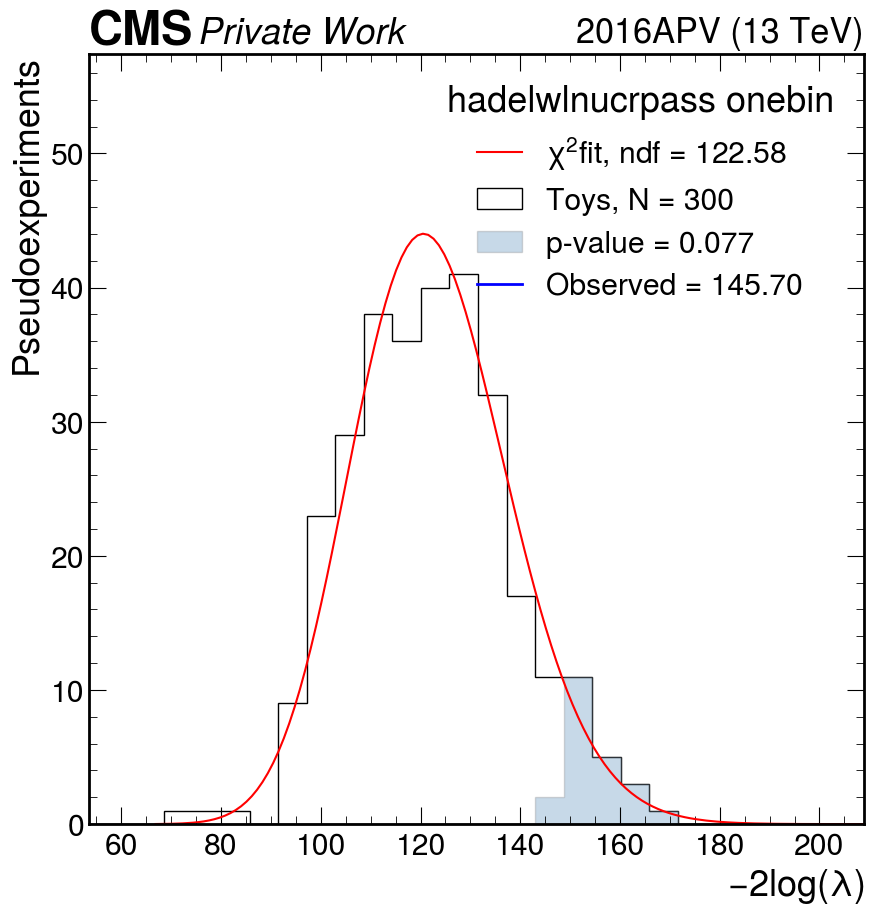

In [99]:
gofplot('higgsCombineBBBBDData.GoodnessOfFit.mH120.root', 'higgsCombineBBBBToy.GoodnessOfFit.mH120.root', year='2016APV', title='hadelwlnucrpass onebin')

XXXXXXX
61.690433842650236
[16.265 27.307 38.349 49.391 60.433 71.475 82.517]
XXXXXXX
P-value 0.125
XXXXXXX
51.412283458540514
[16.362 27.576 38.79  50.004 61.218 72.432 83.646]
XXXXXXX
P-value 0.385
XXXXXXX
50.313900371373165
[13.383 25.551 37.72  49.889 62.058 74.227 86.395]
XXXXXXX
P-value 0.46
XXXXXXX
54.808181800774264
[20.113 30.759 41.405 52.05  62.696 73.342 83.987]
XXXXXXX
P-value 0.345
XXXXXXX
55.10573769302573
[16.117 27.478 38.838 50.198 61.559 72.919 84.28 ]
XXXXXXX
P-value 0.295
XXXXXXX
44.01223372073582
[14.549 26.291 38.033 49.774 61.516 73.257 84.999]
XXXXXXX
P-value 0.645
XXXXXXX
72.09857307886074
[17.992 29.181 40.369 51.558 62.746 73.934 85.123]
XXXXXXX
P-value 0.035
XXXXXXX
46.336462435701264
[17.911 28.801 39.69  50.58  61.469 72.359 83.249]
XXXXXXX
P-value 0.635
XXXXXXX
51.902280618382065
[18.148 29.282 40.416 51.55  62.684 73.817 84.951]
XXXXXXX
P-value 0.44


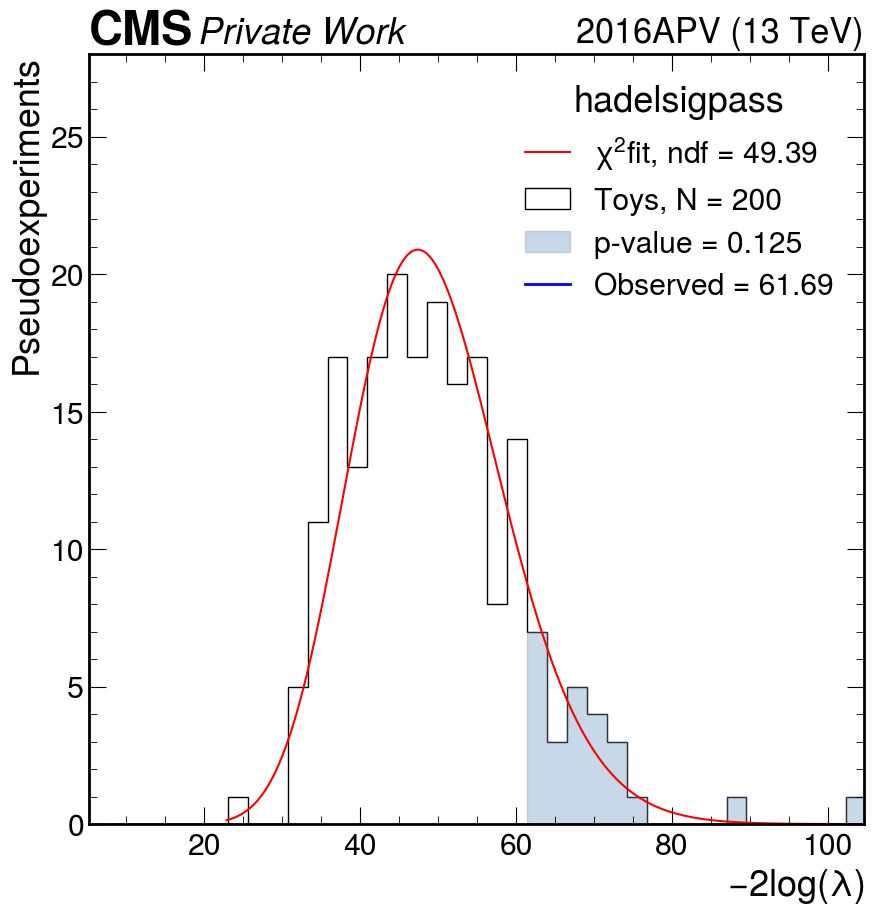

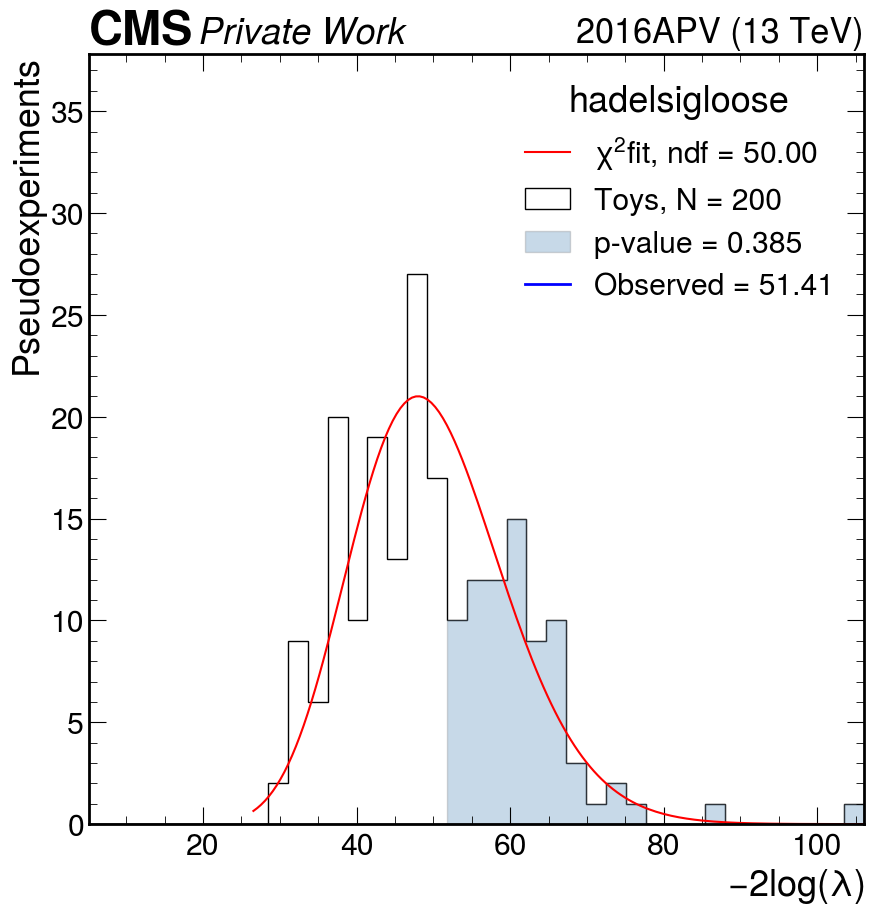

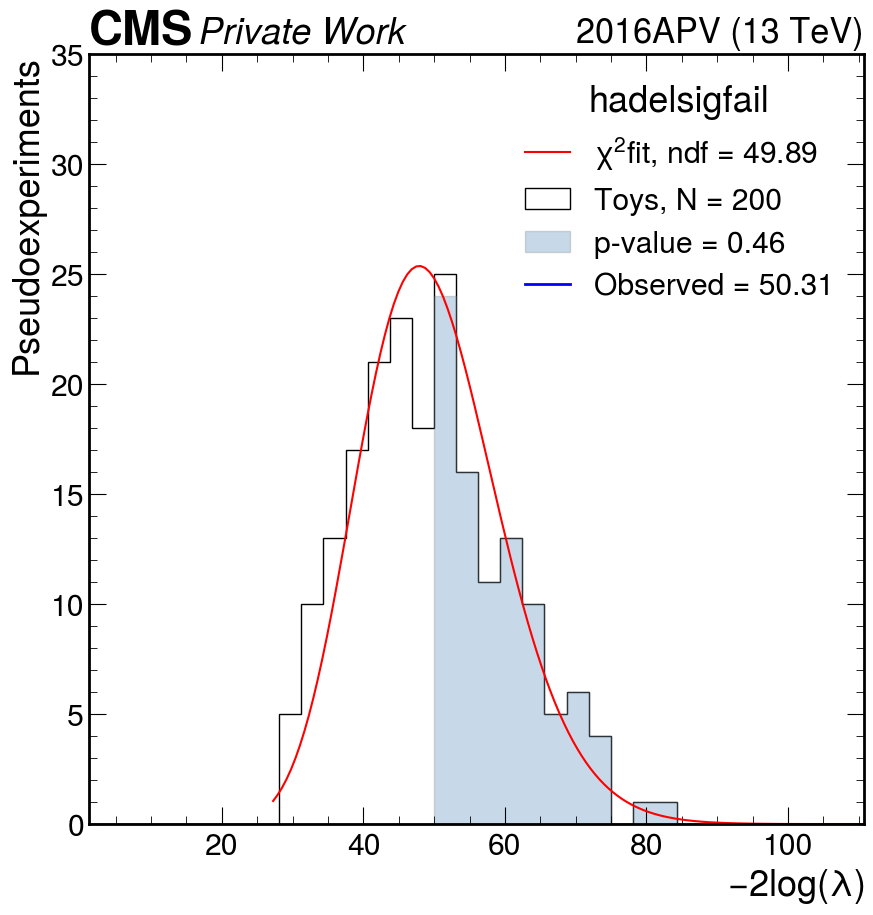

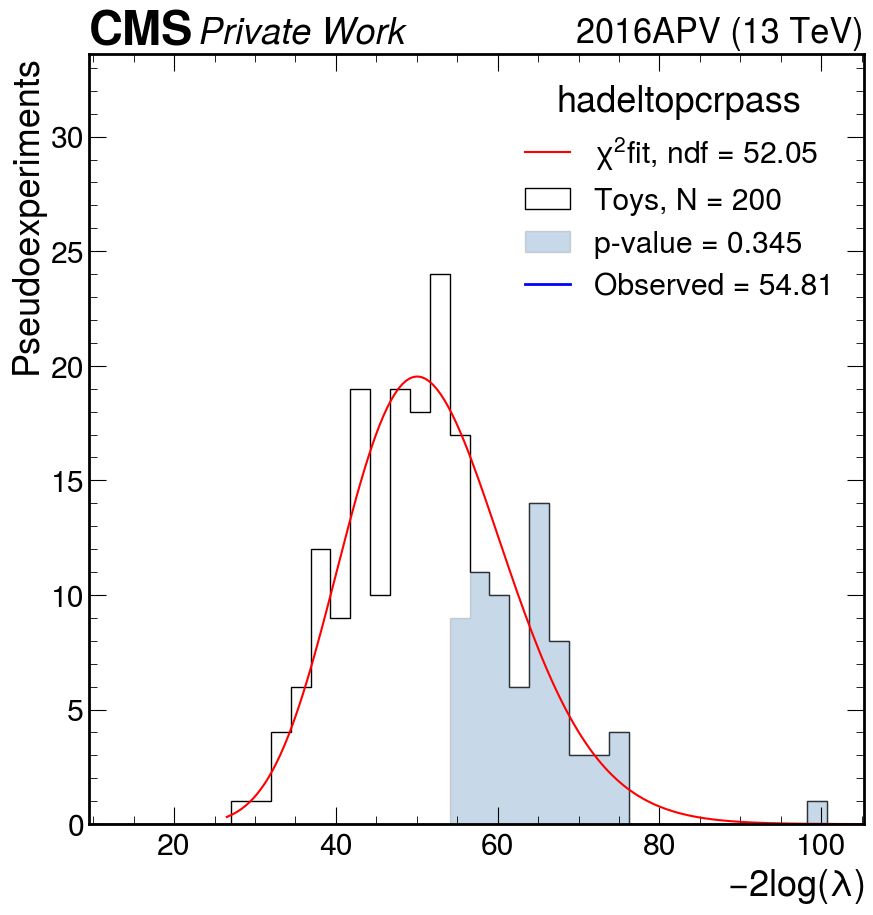

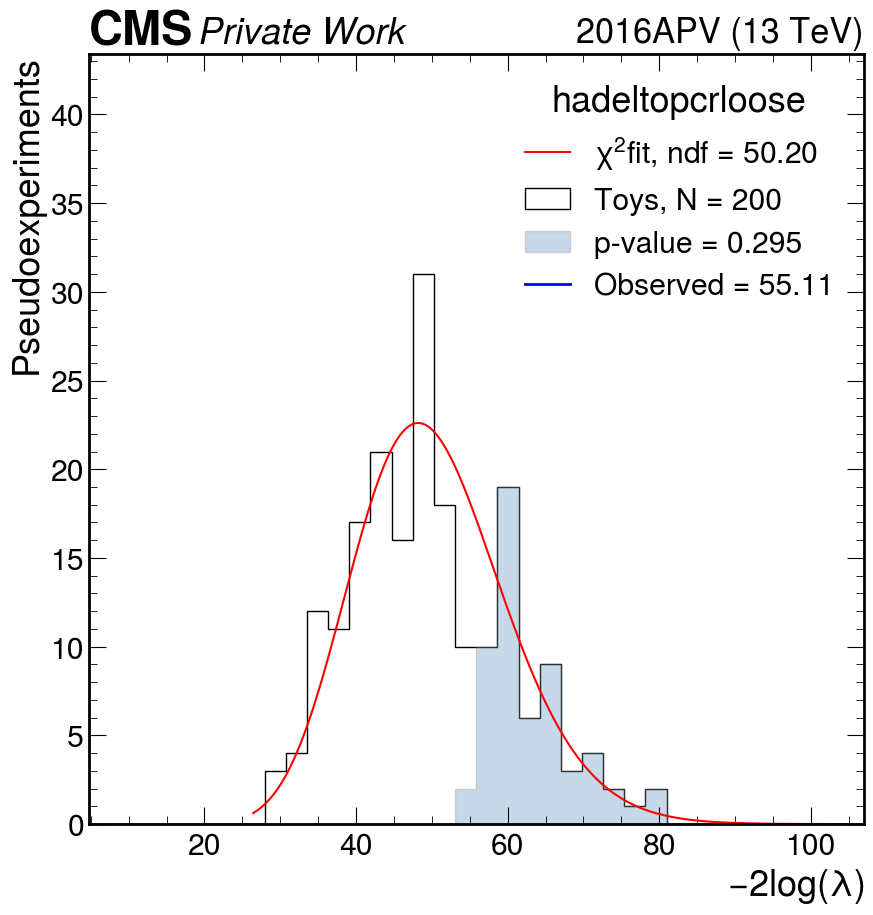

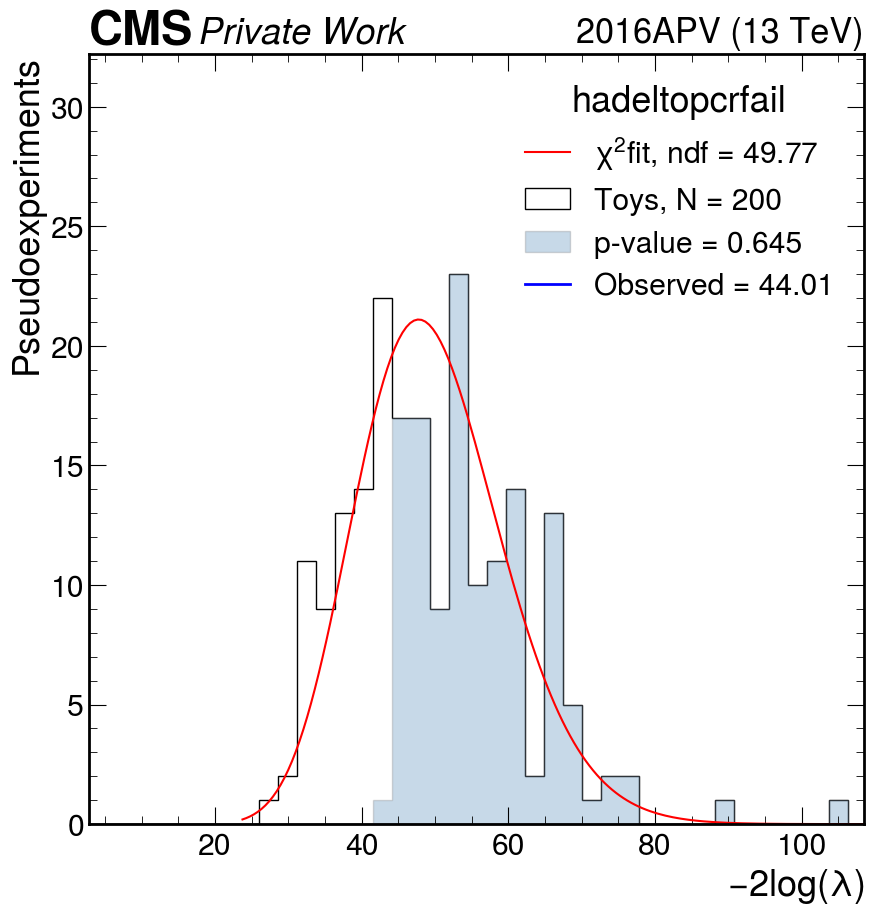

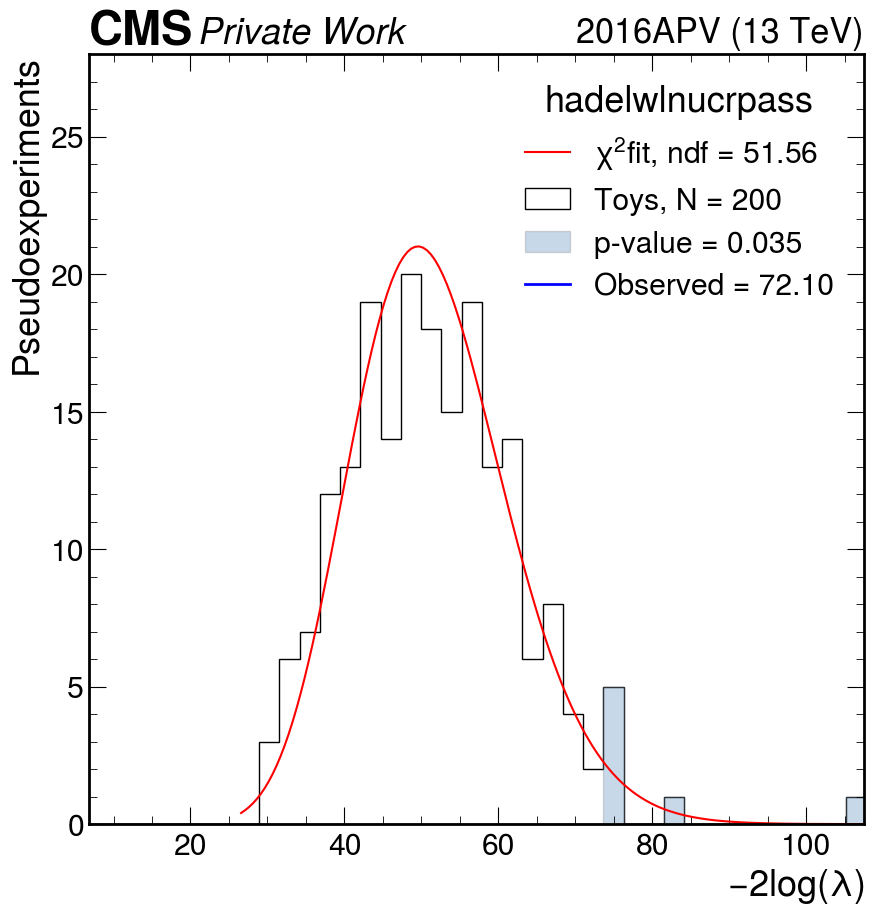

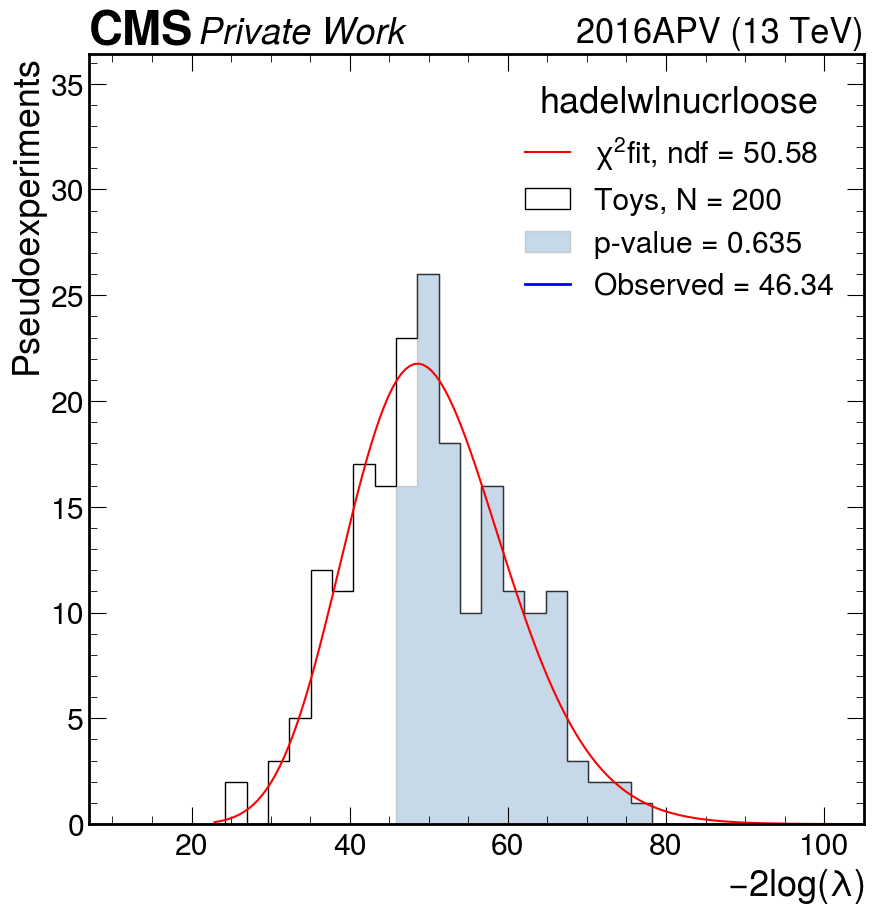

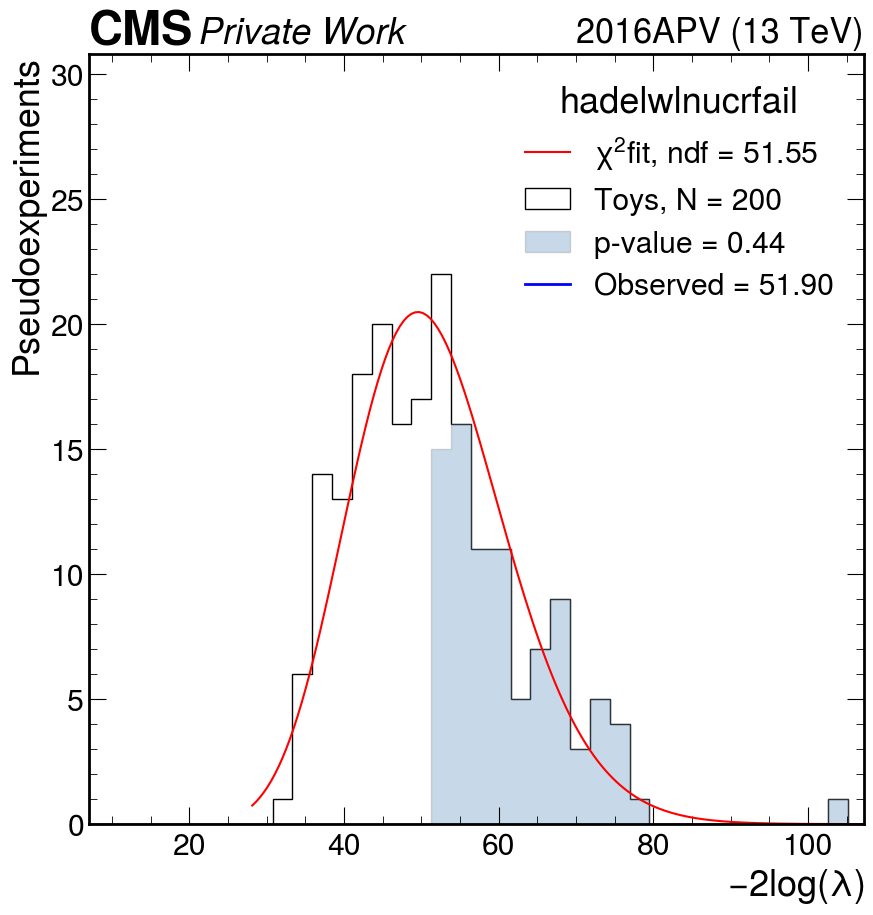

In [41]:
for key in cmd_dict.keys():
    _reg = key.split("_")[-1]
    gofplot(f'ref_{_reg}.root', f'toys_{_reg}.root', year='2016APV', title=_reg)
    # break

In [43]:
"mask_hadelsigpass=1,mask_hadelsigloose=1,mask_hadelsigfail=1,mask_hadeltopcrpass=1,mask_hadeltopcrloose=1,mask_hadeltopcrfail=1,mask_hadelwlnucrpass=0,mask_hadelwlnucrloose=1,mask_hadelwlnucrfail=1".replace("1", "0")

'mask_hadelsigpass=0,mask_hadelsigloose=0,mask_hadelsigfail=0,mask_hadeltopcrpass=0,mask_hadeltopcrloose=0,mask_hadeltopcrfail=0,mask_hadelwlnucrpass=0,mask_hadelwlnucrloose=0,mask_hadelwlnucrfail=0'

In [ ]:
mask_hadelsigpass=0,mask_hadelsigloose=0,mask_hadelsigfail=0,mask_hadeltopcrpass=0,mask_hadeltopcrloose=0,mask_hadeltopcrfail=0,mask_hadelwlnucrpass=1,mask_hadelwlnucrloose=0,mask_hadelwlnucrfail=0




In [67]:
def get_bias(fname, val=1):
    rfile = r.TFile.Open(fname)
    rtree = rfile.Get("limit")
    vals = []
    for i in range(rtree.GetEntries()):
        rtree.GetEntry(i)
        mu = rtree.limit
        errmu = rtree.limitErr
        #print(i, mu, errmu)
        if errmu != 0:
            vals.append((mu-val)/errmu)
    return np.array(vals)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

bvals = np.r_[np.array([0, 1]), np.arange(5, 100, 5)]
mus, sigs = [], []
for bval in bvals:
    h = hist.new.Reg(20, -3, 3).Weight().fill(
    0 - np.array(get_bias(f'testfitall/testModel/y2016/hadhad/bias{bval}.root', bval)))
    # h.plot();
    
    counts, bin_edges = h.values(), h.axes[0].edges
    bin_centers = h.axes[0].centers
    
    # Step 3: Define the Gaussian function
    def gaussian(x, amp, mu, sigma):
        return amp * norm.pdf(x, mu, sigma)
    
    # Step 4: Fit the histogram data
    popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[1, 0, 1])
    print((f"Fit: μ={popt[1]:.2f}, σ={popt[2]:.2f}"))
    mus.append(popt[1])
    sigs.append(popt[2])
    # Step 5: Plot the histogram and fitted Gaussian
    # plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')
    # x = np.linspace(bin_edges[0], bin_edges[-1], 1000)
    # plt.plot(x, gaussian(x, *popt), 'r-', label='Gaussian Fit')
    # plt.xlabel('Value')
    # plt.ylabel('Pseudoexperiments')
    # plt.legend()
    # plt.title(f"Fit: μ={popt[1]:.2f}, σ={popt[2]:.2f}")
    # plt.show()

Fit: μ=0.37, σ=1.10
Fit: μ=0.31, σ=0.96
Fit: μ=0.29, σ=0.90
Fit: μ=0.14, σ=0.89
Fit: μ=-0.02, σ=0.84
Fit: μ=0.00, σ=1.04
Fit: μ=-0.07, σ=0.64
Fit: μ=0.24, σ=0.93
Fit: μ=0.05, σ=1.02
Fit: μ=0.10, σ=0.93
Fit: μ=0.18, σ=1.03
Fit: μ=0.24, σ=0.91
Fit: μ=0.27, σ=0.92
Fit: μ=0.10, σ=0.97
Fit: μ=0.17, σ=0.80
Fit: μ=0.20, σ=1.01
Fit: μ=0.20, σ=0.89
Fit: μ=0.01, σ=1.01
Fit: μ=0.02, σ=0.81
Fit: μ=0.02, σ=1.04
Fit: μ=0.05, σ=0.91


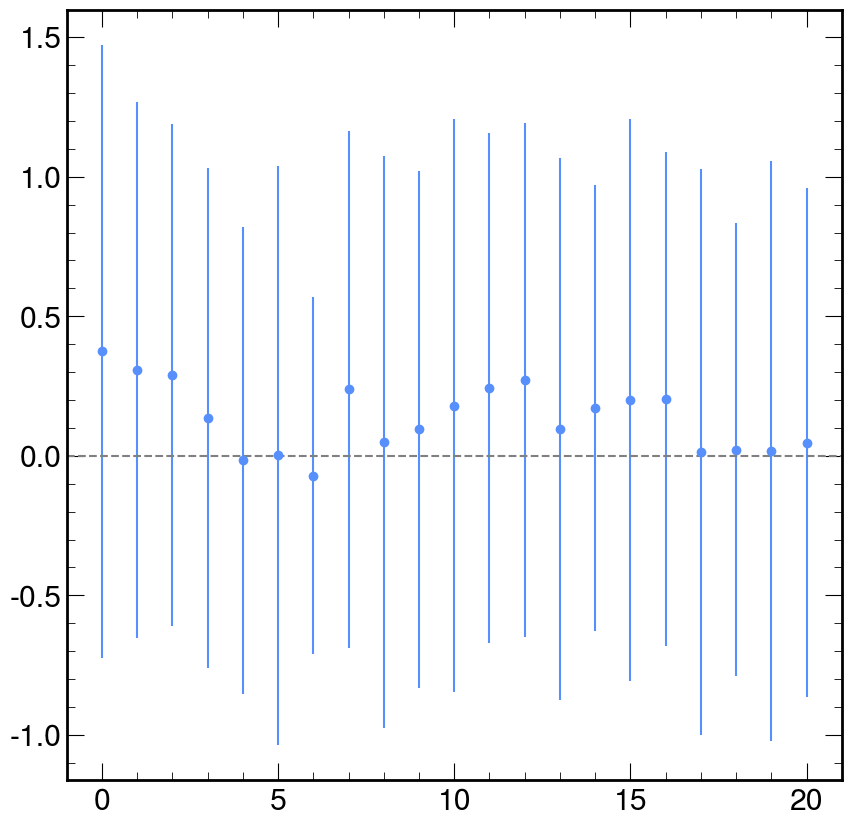

In [74]:
plt.errorbar(np.arange(0, len(sigs), 1), mus, yerr=sigs, fmt='o')
plt.axhline(0, color='gray', ls='--')